In [1]:
from scraper.grid_builder import GridBuilder
from grid_manager import GRID_INDICES
import numpy as np
from scraper.graph_loader import GraphLoader
from scraper.geometry_processor import GeometryProcessor

### Download mesh and get grid from OSM


#### Current version


In [2]:
import os
with open(os.path.join("./grids", "test3"), "w", encoding="utf-8") as file:
    file.write(str(1))
with open(os.path.join("./grids", "test3"), "r", encoding="utf-8") as file:
    print(file.readline())

1


In [3]:
from scraper.data_loader import DataLoader
import matplotlib.pyplot as plt

# IMPORTANT!! - dataloader checks, if the file already exists

cityname = "Tychy"

loader = DataLoader(1)

grid_manager = loader.load_city_grid(cityname, cityname + ".dat")
# loader.add_elevation_to_grid(grid_manager)

FileExistsError: File: Tychy.dat already exists in grids directory

In [4]:
img = grid_manager.read_segment(1,1)[:2000, :2000, 0]

fig, axs = plt.subplots(2, 2, figsize=(10,5))

axs[0,0].imshow(grid_manager.read_segment(0,0)[3000:, 3000:, 0])
axs[0,1].imshow(grid_manager.read_segment(0,1)[3000:, :2000, 0])
axs[1,0].imshow(grid_manager.read_segment(1,0)[:2000, 3000:, 0])
axs[1,1].imshow(grid_manager.read_segment(1,1)[:2000, :2000, 0])

NameError: name 'grid_manager' is not defined

In [5]:
cityname = "Kraków"

loader = GraphLoader()

graph = loader.load_graph(cityname)

print(f"graph: {graph}")

edges = loader.get_edges_measurements(graph)

print(f"edges: {edges}")

gdf_edges = loader.convert_to_gdf(edges)

geometry_processor = GeometryProcessor()
gdf_edges["geometry"] = gdf_edges.apply(lambda row: geometry_processor.get_edge_polygon(row), axis=1)

# np_streets = get_city_grid(f"{cityname}, Poland")
# print("generating altitudes")
# np_altitudes = np.zeros(np_streets.shape, dtype=np.float64) - 10
# print("concatenating")
# grid = np.concat(
#     [
#         np_streets[:, :, np.newaxis],
#         np_altitudes[:, :, np.newaxis]
#     ],
#     2
# )
# write(grid, cityname)
# print(f"wymiary siatki punktów: {grid.shape}")
# print(f"punkt (100, 200): droga {grid[100, 200, GRID_INDICES.IS_STREET_INDEX]}, wysokość: {grid[100, 200, GRID_INDICES.ALTITUDE_INDEX]}")

graph: MultiDiGraph with 91355 nodes and 159667 edges
Roads with 'width' attribute: 65795
Roads without 'width' attribute: 93872
edges: []


ValueError: Assigning CRS to a GeoDataFrame without a geometry column is not supported. Supply geometry using the 'geometry=' keyword argument, or by providing a DataFrame with column name 'geometry'

In [6]:
test = [1,2]
test[2:]

[]

### Data management


In [7]:
from grid_manager import GridManager
import numpy as np

filename = "przyklad1.dat"

src_man = GridManager(filename, 2000, 2000, 0.0, 0.0, 1, 3, 3)

# a = np.zeros((2000, 2000, 2), dtype=np.float64)
is_street = np.array([
    [1, 2, 3, 4, 5, 6],
    [11, 12, 13, 14, 15, 16],
    [21, 22, 23, 24, 25, 26],
    [31, 32, 33, 34, 35, 36],
    [41, 42, 43, 44, 45, 46],
    [51, 52, 53, 54, 55, 56],
])
a = np.zeros((is_street.shape[0], is_street.shape[1], 3))
a[:,:, 0] = is_street

for x in range(2):
    for y in range(2):
        src_man.write_segment(a[y * 3: (y + 1) * 3, x*3:(x + 1) * 3], y, x)


src_man.write_segment(a[:2,:3, :] + 1, 666, 0)
src_man.write_segment(a[:3,:2, :] + 2, 0, 666)

man = src_man.deep_copy()

print(f"1: {man.read_segment(0, 0)[:, :, 0]}")
print(f"2: {man.read_segment(0, 1)[:, :, 0]}")
print(f"3: {man.read_segment(1, 0)[:, :, 0]}")
print(f"4: {man.read_segment(1, 1)[:, :, 0]}")
print(f"5: {man.read_segment(666, 666)[:, :, 0]}")

print(man.get_metadata())

man.delete()

# len(is_street.tobytes())


1: [[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]]
2: [[ 4.  5.  6.]
 [14. 15. 16.]
 [24. 25. 26.]]
3: [[31. 32. 33.]
 [41. 42. 43.]
 [51. 52. 53.]]
4: [[34. 35. 36.]
 [44. 45. 46.]
 [54. 55. 56.]]
5: [[0. 0.]
 [0. 0.]]
GridFileMetadata(version=1, rows_number=2000, columns_number=2000, upper_left_longitude=0.0, upper_left_latitude=0.0, grid_density=1.0, segment_h=3, segment_w=3, byteorder='little', third_dimension_size=3, metadata_bytes=35)


### Streets discovery


In [8]:
import matplotlib.pyplot as plt

def show_crossroads(img_height, img_width, conflictless_crossroads, conflicting_crossroads):
    fig, axs = plt.subplots(  max(2, len(conflictless_crossroads), len(conflicting_crossroads)), 6, figsize=(10,5))
    axs[0, 0].set_title("conflictless")
    axs[0, 1].set_title("junctions")
    axs[0, 2].set_title("conflicts")
    axs[0, 3].set_title("conflicting")
    axs[0, 4].set_title("junctions")
    axs[0, 5].set_title("conflicts")


    for i in range(len(conflictless_crossroads)):
        crossroad = conflictless_crossroads[i]

        crossroad_image = np.zeros((img_height, img_width))
        for point in crossroad.points:
            crossroad_image[point] = 1

        axs[i, 0].imshow(crossroad_image)

    for i in range(len(conflictless_crossroads)):
        crossroad = conflictless_crossroads[i]

        crossroad_image = np.zeros((img_height, img_width))
        for street in crossroad.street_junctions.keys():
            crossroad_image[crossroad.street_junctions[street]] = 1

        axs[i, 1].imshow(crossroad_image)

    for i in range(len(conflictless_crossroads)):
        crossroad = conflictless_crossroads[i]

        crossroad_image = np.zeros((img_height, img_width))
        for point in crossroad.conflicting_points:
            crossroad_image[point] = 1

        axs[i, 2].imshow(crossroad_image)

    for i in range(len(conflicting_crossroads)):
        crossroad = conflicting_crossroads[i]

        crossroad_image = np.zeros((img_height, img_width))
        for point in crossroad.points:
            crossroad_image[point] = 1

        axs[i, 3].imshow(crossroad_image)

    for i in range(len(conflicting_crossroads)):
        crossroad = conflicting_crossroads[i]

        crossroad_image = np.zeros((img_height, img_width))
        for street in crossroad.street_junctions.keys():
            crossroad_image[crossroad.street_junctions[street]] = 1

        axs[i, 4].imshow(crossroad_image)

    for i in range(len(conflicting_crossroads)):
        crossroad = conflicting_crossroads[i]

        crossroad_image = np.zeros((img_height, img_width))
        for point in crossroad.conflicting_points:
            crossroad_image[point] = 1

        axs[i, 5].imshow(crossroad_image)


In [9]:
import matplotlib.pyplot as plt

def show_streets(img_height, img_width, conflictless_streets, conflicting_streets):
    fig, axs = plt.subplots(  max(2, len(conflictless_streets), len(conflicting_streets)), 4, figsize=(10,8))
    axs[0, 0].set_title("conflictless")
    axs[0, 1].set_title("conflicts")
    axs[0, 2].set_title("conflicting")
    axs[0, 3].set_title("conflicts")


    for i in range(len(conflictless_streets)):
        street = conflictless_streets[i]

        street_image = np.zeros((img_height, img_width))
        for point in street.linestring:
            street_image[point] = 1

        axs[i, 0].imshow(street_image)
    
    for i in range(len(conflictless_streets)):
        street = conflictless_streets[i]

        street_image = np.zeros((img_height, img_width))
        for point in street.conflicts:
            street_image[point] = 1

        axs[i, 1].imshow(street_image)

    for i in range(len(conflicting_streets)):
        street = conflicting_streets[i]

        street_image = np.zeros((img_height, img_width))
        for point in street.linestring:
            street_image[point] = 1

        axs[i, 2].imshow(street_image)
    
    for i in range(len(conflicting_streets)):
        street = conflicting_streets[i]

        street_image = np.zeros((img_height, img_width))
        for point in street.conflicts:
            street_image[point] = 1

        axs[i, 3].imshow(street_image)


#### Diamond


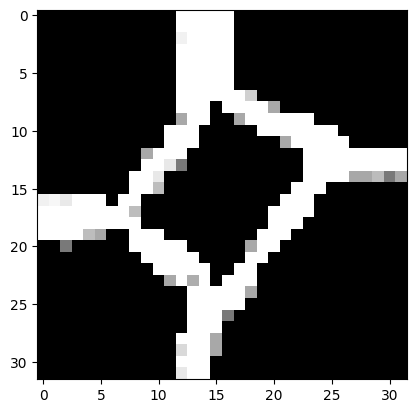

In [10]:
import numpy as np
from skimage.morphology import skeletonize
from graph_remaker.morphological_remaker import discover_streets
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("test_images/diamond.png", cv2.IMREAD_GRAYSCALE)
plt.gray()
bin_image = image > 0
# plt.imshow(bin_image * 255)

processed_image = bin_image[:, :, np.newaxis]
processed_image = np.concatenate((processed_image, np.zeros(processed_image.shape)), axis=2)

conflictless_crossroads, conflicting_crossroads, conflictless_streets, conflicting_streets = discover_streets(processed_image)

height, width = image.shape
plt.imshow(image)

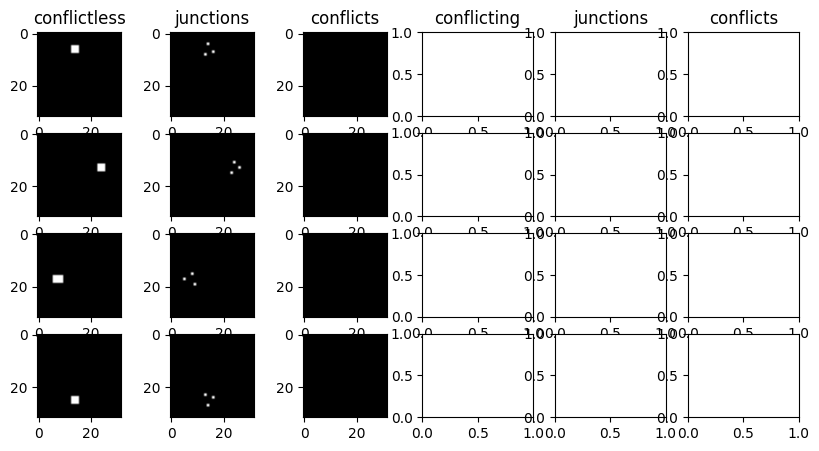

In [11]:
show_crossroads(height, width, conflictless_crossroads, conflicting_crossroads)

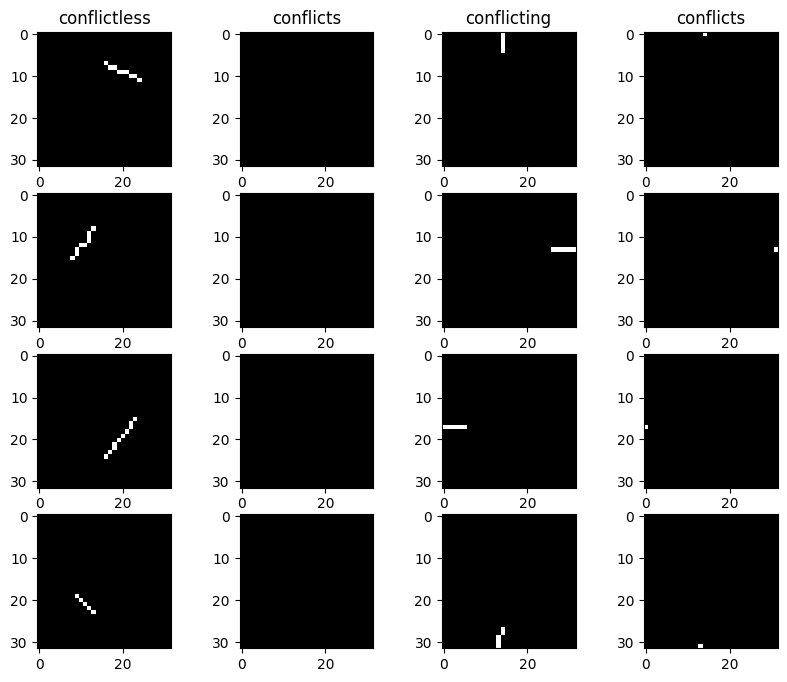

In [12]:
show_streets(height, width, conflictless_streets, conflicting_streets)

#### Conflicting crossroad and dead-end


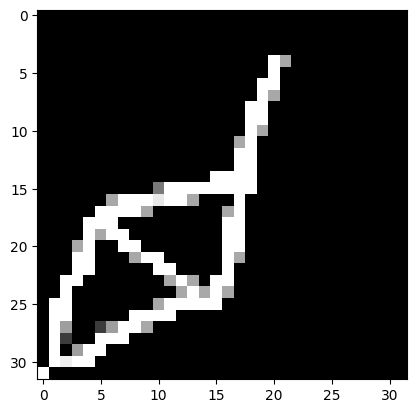

In [13]:
import numpy as np
from skimage.morphology import skeletonize
from graph_remaker.morphological_remaker import discover_streets
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("test_images/crossroad_conflict_deadend.png", cv2.IMREAD_GRAYSCALE)
plt.gray()
bin_image = image > 0
# plt.imshow(bin_image * 255)

processed_image = bin_image[:, :, np.newaxis]
processed_image = np.concatenate((processed_image, np.zeros(processed_image.shape)), axis=2)

conflictless_crossroads, conflicting_crossroads, conflictless_streets, conflicting_streets = discover_streets(processed_image)

height, width = image.shape
plt.imshow(image)

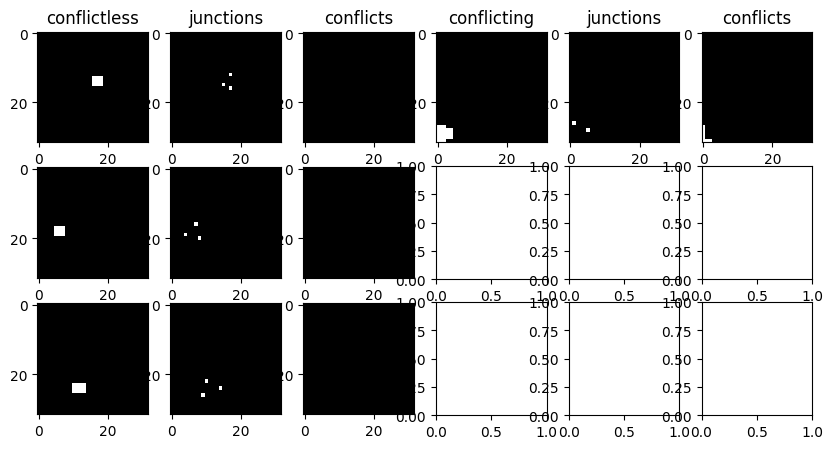

In [14]:
show_crossroads(width, height, conflictless_crossroads, conflicting_crossroads)

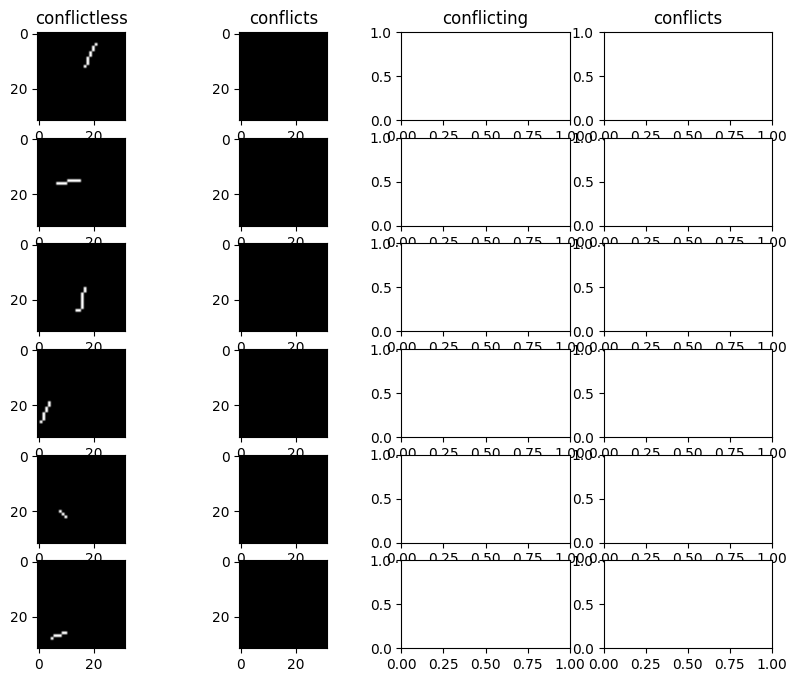

In [15]:
show_streets(width, height, conflictless_streets, conflicting_streets)

# Training


In [2]:
from trainer.clipping_sequence import ClippingBatchSequence
from trainer.batch_sequence import BatchSequence

2026-01-14 11:22:17.367816: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-14 11:22:17.722868: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-14 11:22:19.359474: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/jakseluz/miniconda3/envs/croada/lib/python3.12/site-packages/keras/src/exp

#### Create batch sequence of clippings that are the candidates for a model and print the shape of the input


In [6]:
batchSeq = ClippingBatchSequence(
            BatchSequence(
                files=list(["Tychy.dat"]),
                batch_size=1,
                cut_sizes=[(512, 512)],
            ),
            clipping_size=512,
            input_grid_surplus=64,
        )

X, Y = batchSeq[0]
print(X.shape)

Cut size: (512, 512), Max start points: x=11190, y=9956
Requested cut at (1249, 7061) of size (512, 512) with surplus 0, clipping=False
Cut from segments: start_x=1249, start_y=7061, end_x=1761, end_y=7573
Segment size: w=5000, h=5000
Segments to read: start_x=0, start_y=1, end_x=0, end_y=1
Reading segment at (0, 1) with shape (5000, 5000, 3)
Clipping index: 0 -> 0 0
Requested cut at (0, 0) of size (512, 512) with surplus 64, clipping=True
Cut from segments: start_x=0, start_y=0, end_x=512, end_y=512
Segment size: w=5000, h=5000
Segments to read: start_x=0, start_y=0, end_x=0, end_y=0
Reading segment at (0, 0) with shape (512, 512, 3)
Batch shapes so far: (1, 512, 512, 2) (1, 2, 448, 448, 1)
(1, 512, 512, 2)


#### Display example clipping (X and y)


X min/max: 0.0 1.0
Y min/max: 0.0 1.0


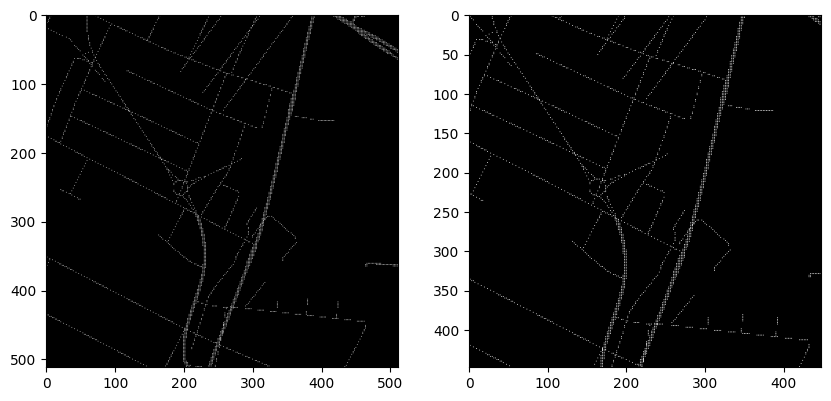

In [7]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(X[0, :, :, 0], cmap='grey')
axs[1].imshow(Y["is_street"][0, :, :, 0], cmap='grey')
print("X min/max:", X[0, :, :, 0].min(), X[0, :, :, 0].max())
print("Y min/max:", Y["is_street"][0, :, :, 0].min(), Y["is_street"][0, :, :, 0].max())

#### Show available GPUs


In [8]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:GPU:0']


I0000 00:00:1768386255.151918   19915 gpu_device.cc:2020] Created device /device:GPU:0 with 2136 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


#### Define a model and then cities for the trainer (e.g. Tychy) as the files list


In [9]:
from trainer.clipping_model import ClippingModel, tf
from trainer.trainer import Trainer

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

model = ClippingModel(clipping_size=512, clipping_surplus=64, path="model_test_13_01_13_22")
trainer = Trainer(model=model, files=["Tychy.dat"])

Num GPUs Available:  1


I0000 00:00:1768386346.614963   19915 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2136 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


#### Run fitting which created the above batch sequence and trains the model

`random_fit_from_files(self, epochs: int = 100, steps_per_epoch=1000)`


In [ ]:
trainer.random_fit_from_files(5)

/home/jakseluz/miniconda3/envs/croada/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Cut size: (512, 512), Max start points: x=11190, y=9956
Requested cut at (7648, 6889) of size (512, 512) with surplus 0, clipping=False
Cut from segments: start_x=7648, start_y=6889, end_x=8160, end_y=7401
Segment size: w=5000, h=5000
Segments to read: start_x=1, start_y=1, end_x=1, end_y=1
Reading segment at (1, 1) with shape (5000, 5000, 3)
Clipping index: 0 -> 0 0
Requested cut at (0, 0) of size (512, 512) with surplus 64, clipping=True
Cut from segments: start_x=0, start_y=0, end_x=512, end_y=512
Segment size: w=5000, h=5000
Segments to read: start_x=0, start_y=0, end_x=0, end_y=0
Reading segment at (0, 0) with shape (512, 512, 3)
Batch shapes so far: (1, 512, 512, 2) (1, 2, 448, 448, 1)
Cut size: (512, 512), Max start points: x=11190, y=9956
Requested cut at (9497, 6908) of size (512, 512) with surplus 0, clipping=False
Cut from segments: start_x=9497, start_y=6908, end_x=10009, end_y=7420
Segment size: w=5000, h=5000
Segments to read: start_x=1, start_y=1, end_x=2, end_y=1
Readin

2026-01-14 11:00:04.733265: I external/local_xla/xla/service/service.cc:163] XLA service 0x7f107c019160 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-01-14 11:00:04.733278: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2026-01-14 11:00:05.263239: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-01-14 11:00:08.358986: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91701


   1/1000 ━━━━━━━━━━━━━━━━━━━━ 42:34:43 153s/step - altitude_loss: 0.0044 - altitude_mae: 0.0077 - is_street_accuracy: 0.8925 - is_street_loss: 0.6940 - loss: 0.6985

I0000 00:00:1768384811.965424   12756 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Cut size: (512, 512), Max start points: x=11190, y=9956
Requested cut at (8085, 1578) of size (512, 512) with surplus 0, clipping=False
Cut from segments: start_x=8085, start_y=1578, end_x=8597, end_y=2090
Segment size: w=5000, h=5000
Segments to read: start_x=1, start_y=0, end_x=1, end_y=0
Reading segment at (1, 0) with shape (5000, 5000, 3)
Clipping index: 1 -> 0 1
Requested cut at (0, 1) of size (512, 512) with surplus 64, clipping=True
Cut from segments: start_x=0, start_y=0, end_x=512, end_y=512
Segment size: w=5000, h=5000
Segments to read: start_x=0, start_y=0, end_x=0, end_y=0
Reading segment at (0, 0) with shape (512, 512, 3)
Batch shapes so far: (1, 512, 512, 2) (1, 2, 448, 448, 1)
   2/1000 ━━━━━━━━━━━━━━━━━━━━ 6:21:30 23s/step - altitude_loss: 0.0068 - altitude_mae: 0.0109 - is_street_accuracy: 0.8766 - is_street_loss: 0.6940 - loss: 0.7008  Cut size: (512, 512), Max start points: x=11190, y=9956
Requested cut at (1226, 5772) of size (512, 512) with surplus 0, clipping=Fals